Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0991 - val_loss: 0.0830
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0853 - val_loss: 0.0828
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0832 - val_loss: 0.0828
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0840 - val_loss: 0.0831
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0837 - val_loss: 0.0828
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.0834 - val_loss: 0.0834
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0837 - val_loss: 0.0827
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0835 - val_loss: 0.0829
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.0828 - val_loss: 0.0826
Epoch 10/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0835 - val_loss: 0.0828
Epoch 11/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0827 - val_loss: 0.0828
Epoch 12/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 

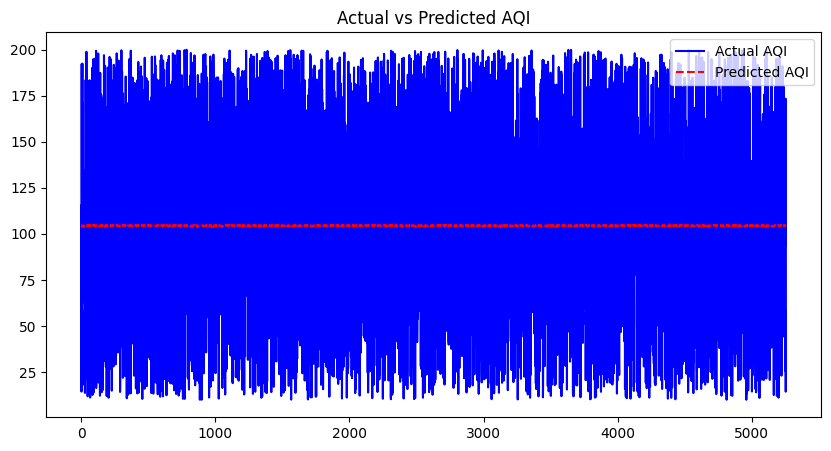

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset (replace 'air_quality_data.csv' with actual file)
df = pd.read_csv("air_quality_data.csv")

# Select relevant features (PM2.5, PM10, NO2, CO, traffic, weather)
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'traffic', 'temperature', 'humidity', 'wind_speed']
df = df[features].dropna()

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Prepare input-output sequences (past 24 hours -> next hour AQI)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length][0])  # Predicting PM2.5 (AQI indicator)
    return np.array(X), np.array(y)

seq_length = 24  # Use past 24 hours to predict next hour AQI
X, y = create_sequences(df_scaled, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output AQI prediction
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(np.column_stack([y_test] + [np.zeros(y_test.shape) for _ in range(len(features)-1)]))[:, 0]
y_pred_inv = scaler.inverse_transform(np.column_stack([y_pred.flatten()] + [np.zeros(y_pred.shape) for _ in range(len(features)-1)]))[:, 0]

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse}')

# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual AQI', color='blue')
plt.plot(y_pred_inv, label='Predicted AQI', color='red', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted AQI')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')